In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
all_data = pd.read_csv('all-data.csv', encoding='latin-1')

In [5]:
#display first five rows
all_data.head()

,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


We have two columns Text and the sentiment.

In [6]:
#display the total number of records
print('The shape of the input file:', all_data.shape)

The shape of the input file: (4846, 2)


In [7]:
#display the unique sentiment values present in the data
all_data['Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

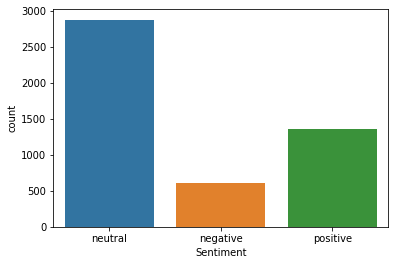

In [8]:
#totally we have 3 categories, let's represent the same in a bar chart
sns.countplot(all_data['Sentiment'])

In [9]:
#let's drop the neutral and retain only the text corresponding to negative & positive sentiments
sentiment_df = all_data[all_data['Sentiment'] != 'neutral']

In [10]:
sentiment_df['Sentiment'].value_counts()

positive    1363
negative     604
Name: Sentiment, dtype: int64

In [11]:
#displaying the data structure
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 2 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  1967 non-null   object
 1   Text       1967 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


From the count above, we can say there are no missing values.

In [12]:
#check whether null values are present in the file
sentiment_df.isna().sum()

Sentiment    0
Text         0
dtype: int64

#### Preprocessing Steps

In [13]:
#step1 => conversion to lower case
sentiment_df['Text'] = sentiment_df['Text'].apply(lambda x: x.lower())

In [14]:
#before applying regular expression, let's expand the contractions
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
! pip install language-check
! pip install pycontractions

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre op

In [15]:
from pycontractions import Contractions
import gensim.downloader as api

model = api.load("glove-twitter-25")
cont = Contractions(kv_model=model)
cont.load_models()

[==================================================] 100.0% 104.8/104.8MB downloaded


In [16]:
#let's apply the pycontractions to expand the data
def expand_contract(x):
  return ''.join(list(cont.expand_texts([x])))

In [17]:
sentiment_df['Text'] = sentiment_df['Text'].apply(expand_contract)

In [18]:
#removing the punctuations
import nltk
nltk.download('punkt') # download the tokenizer

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&',
          '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
          '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
          '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '\xa0', '\t',
          '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑',
          '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '\u3000', '\u202f',
          '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫',
          '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '«',
          '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・',
          '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√','☺','•','\u200e','·','…',
          'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
          'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w' , 'x', 'y', 'z']

def advance_punct_remove(x):
  list1 = [str(word) for word in nltk.word_tokenize(x) if word not in puncts]  
  return ' '.join(list1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
sentiment_df['Text'] = sentiment_df['Text'].apply(advance_punct_remove)

In [20]:
#stopword removal
import nltk 
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
#we need to retain negative words such as no, nor and not.
#These set of words will be removed from the stopword list
remove_list = ['no', 'nor', 'not']
for i in remove_list:
  stop_list.remove(i)

In [22]:
stop_list[:5]

['i', 'me', 'my', 'myself', 'we']

In [23]:
def stopword_remove(x):
  list1 = [str(word.lower()) for word in nltk.word_tokenize(x) if word not in stop_list]  
  return ' '.join(list1)


In [24]:
sentiment_df['Text'] = sentiment_df['Text'].apply(stopword_remove)

In [25]:
#let's use the word cloud and see the most frequent words
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

def display_words(x, y): #x => description, y=> number represent how many words
    tokenizer = Tokenizer(lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
    tokenizer.fit_on_texts(x)
    word_list = tokenizer.word_index
    print('The length of the word list:', len(word_list))

    #extract keys and store it in list in python
    dict_keys = word_list.keys()
    key_list = []

    for key in dict_keys:
      key_list.append(key)
    
    if y > 0:            
      wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text = ' '.join(key_list[:y]))
    else:
      wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text = ' '.join(key_list[y:]))

    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off') 

The length of the word list: 5446


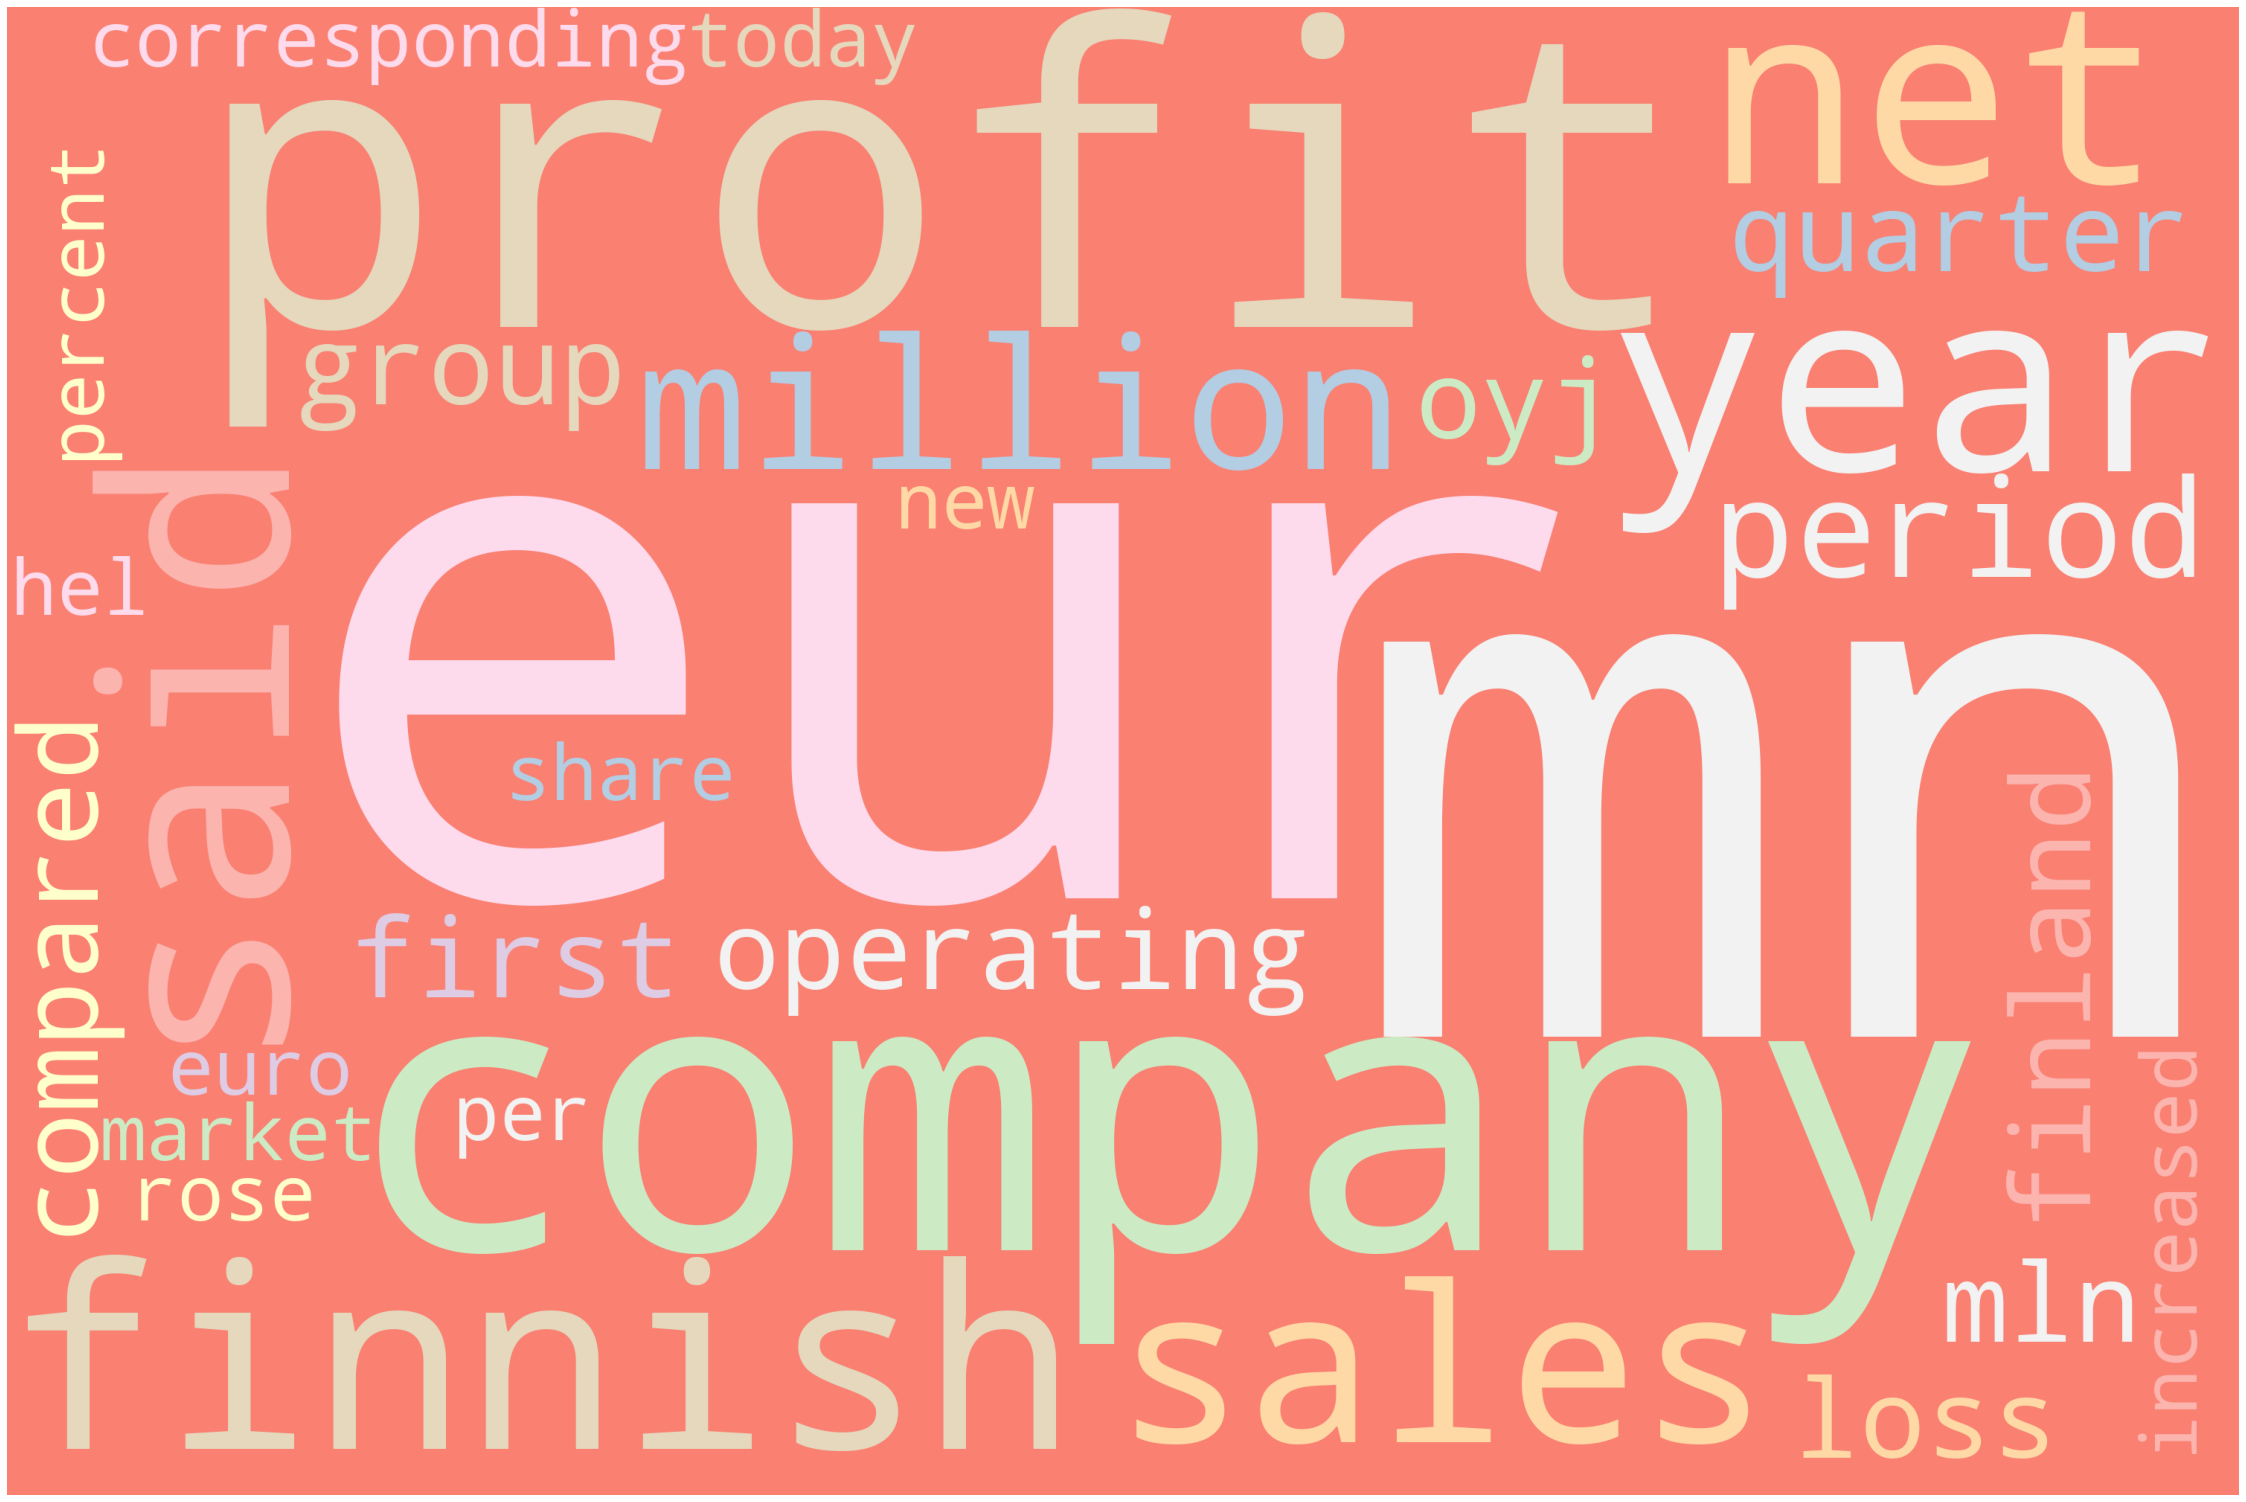

In [26]:
#let is display the most 50 frequent words used in the Text
x = sentiment_df['Text']
y = 50
display_words(x, y)

The length of the word list: 5446


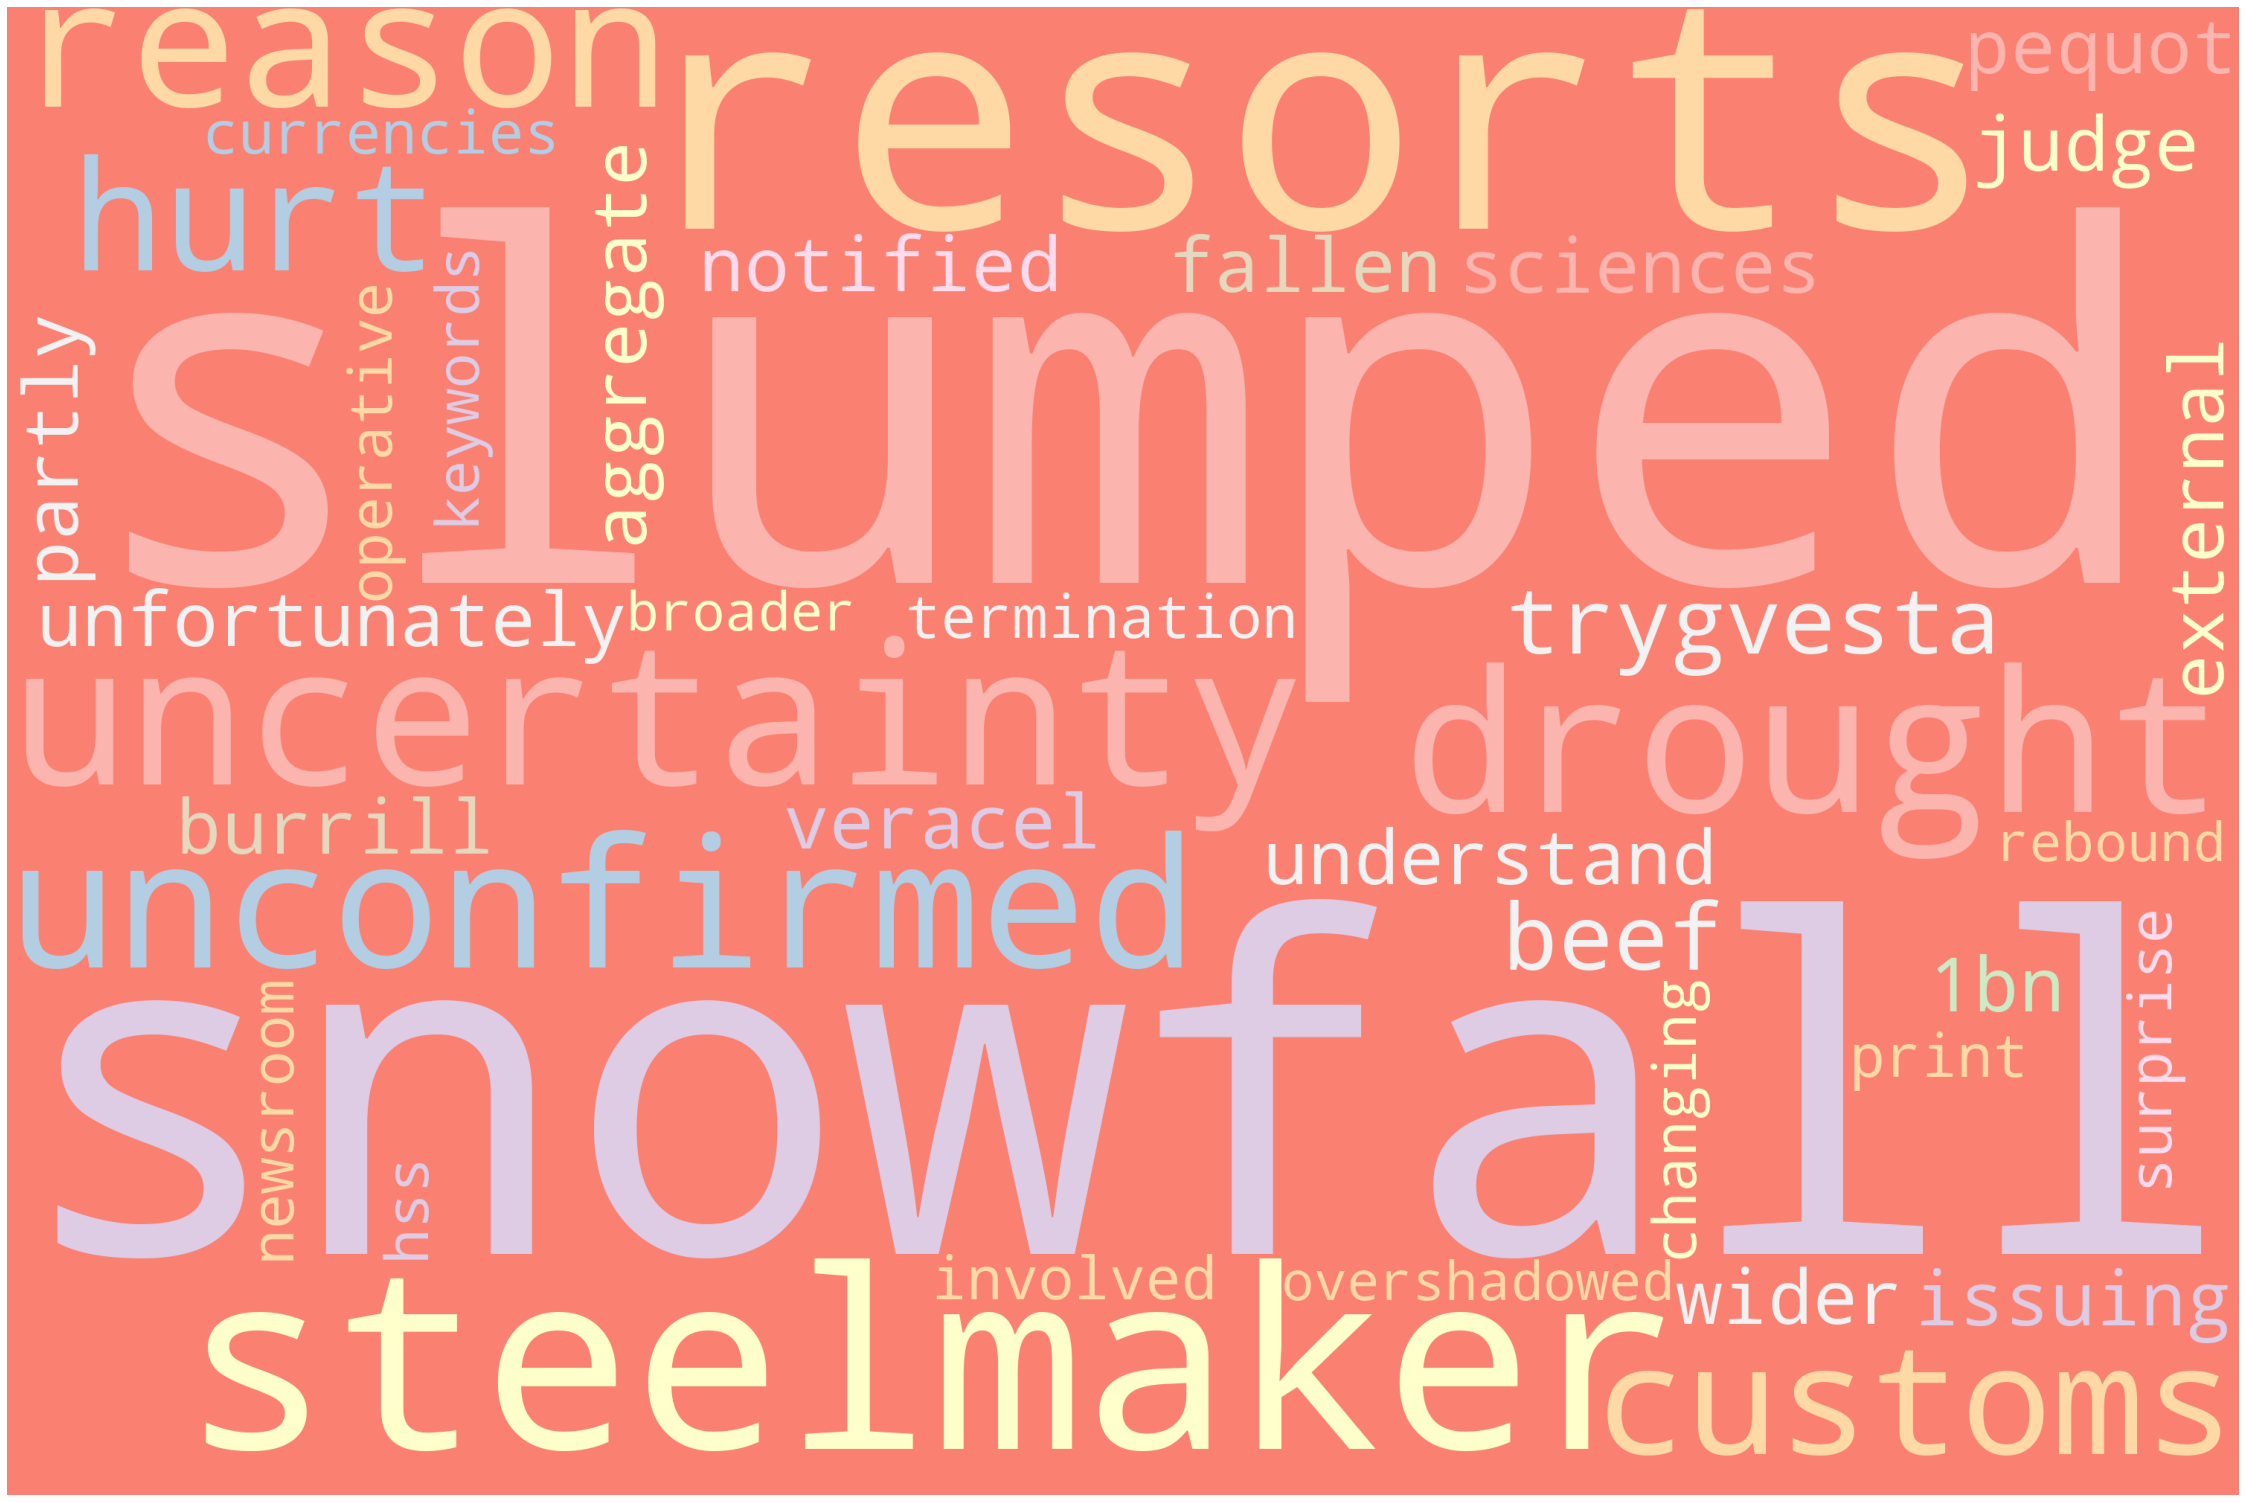

In [27]:
#let is display the least 50 frequent words used in the Text
x = sentiment_df['Text']
y = -50
display_words(x, y)

In [28]:
#wordnet library to exclude non-english words
nltk.download('wordnet')
from nltk.corpus import wordnet

def check_english(x):
  nonenglish_list = []
  for word in x.split(' '):
    if not wordnet.synsets(word):
      nonenglish_list.append(word)
  return ' '.join(nonenglish_list)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [29]:
sentiment_df['nonenglish_Text'] = sentiment_df['Text'].apply(check_english)

In [30]:
#now the non-english words have been extracted, let's see what are the most frequent words
tokenizer = Tokenizer(lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
tokenizer.fit_on_texts(sentiment_df['nonenglish_Text'])

word_list = tokenizer.word_index#extract keys and store it in list in python
dict_keys = word_list.keys()
nonenglish_list = []

for key in dict_keys:
  nonenglish_list.append(key)

print('First 10 words in the nonenglish list:', nonenglish_list[:10]) #include in documentation
print('Last 10 words in the nonenglish list:', nonenglish_list[-10:])

First 10 words in the nonenglish list: ['eur', "'s", '1', '2', '5', '3', '0', 'mln', '2009', '4']
Last 10 words in the nonenglish list: ['i', 'print', 'seven', '364', '029', '813', '191', 'keywords', 'results', '221']


As we can see, these words could be eliminated from the final list.

In [31]:
#before removing the word completely, we can check count of each word
word_count_dict = {}
for word in nonenglish_list:
  word_count_dict[word] = tokenizer.word_counts[word]

In [32]:
word_count_dict

{'eur': 775,
 "'s": 421,
 '1': 280,
 '2': 214,
 '5': 208,
 '3': 207,
 '0': 197,
 'mln': 196,
 '2009': 195,
 '4': 177,
 '2008': 172,
 '6': 157,
 '8': 151,
 '2010': 149,
 '9': 149,
 'oyj': 148,
 '2007': 143,
 '7': 142,
 "''": 118,
 '2006': 99,
 'year': 97,
 '000': 88,
 'per': 77,
 '2005': 77,
 'eur0': 52,
 'omx': 51,
 'nokia': 49,
 'usd': 47,
 'eps': 41,
 'on': 40,
 '12': 38,
 '11': 38,
 'would': 33,
 '2004': 33,
 'month': 33,
 '14': 32,
 '10': 31,
 'pretax': 30,
 '15': 30,
 '2011': 29,
 'based': 29,
 'non': 27,
 'january': 27,
 'ruukki': 24,
 'finnair': 24,
 'm': 23,
 '16': 23,
 'stora': 22,
 'recurring': 22,
 '13': 21,
 'oy': 21,
 'versus': 21,
 'enso': 20,
 'ltd': 20,
 'eur1': 20,
 'elcoteq': 19,
 'upm': 19,
 '17': 19,
 'plc': 19,
 '30': 19,
 'yit': 19,
 '19': 18,
 'basware': 17,
 '23': 17,
 '21': 17,
 'quarter': 17,
 '33': 17,
 'september': 17,
 'x20ac': 17,
 'metso': 17,
 'fiskars': 16,
 'kesko': 16,
 'konecranes': 16,
 'cargotec': 16,
 '18': 15,
 '35': 15,
 'teleste': 15,
 'eur2': 

In [33]:
#now we have the non-english list, we can drop the column nonenglish_Text
sentiment_df.drop('nonenglish_Text', axis=1, inplace=True)

In [34]:
#using nonenglish_list remove those words spellcorrect_desc
def nonenglish_remove(x):
  list1 = [str(word) for word in nltk.word_tokenize(x) if word not in nonenglish_list]  
  return ' '.join(list1)

In [35]:
sentiment_df['Text'] = sentiment_df['Text'].apply(nonenglish_remove)

In [36]:
sentiment_df.head(2)

,Sentiment,Text
2,negative,international electronic laid tens employees f...
3,positive,new production plant increase capacity meet in...


In [37]:
#we can remove individual characters, as they do not carry much meaning
#remove the individual characters if any in the sentence
#tokenize the sentences and remove the stopwords from each sentence
import nltk
nltk.download('punkt') # download the tokenizer

indiv_chars = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 
               'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w' , 'x', 'y', 'z', ' ', '']

def advance_punct_remove(x):
  list1 = [str(word) for word in nltk.word_tokenize(x) if word not in indiv_chars]  
  return ' '.join(list1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
sentiment_df['Text'] = sentiment_df['Text'].apply(advance_punct_remove)

In [39]:
#we can remove the words which are less frequent as they do not carry any generic meaning
tokenizer = Tokenizer(lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
tokenizer.fit_on_texts(sentiment_df['Text'])

key_order = {k: v for k, v in sorted(tokenizer.word_counts.items(), key=lambda item: item[1])}

In [40]:
#we can drop the words which have the count lesser than '1'
ignore_list = []

for key, value in key_order.items():
  if value <  2:
    ignore_list.append(key)

In [41]:
#remove the words present in the ignore list
def remove_ignore(x):
  list1 = [str(word) for word in x.split(' ') if word not in ignore_list]  
  return ' '.join(list1)

sentiment_df['Text'] = sentiment_df['Text'].apply(remove_ignore)

In [42]:
#before proceeding with train/test split, we need to decide the maximum length of the text
def length_calc(x):
  return len(x.split(' '))

sentiment_df['length'] = sentiment_df['Text'].map(length_calc)

In [43]:
print('maximum length of the text:', sentiment_df['length'].max())
print('minimum length of the text:', sentiment_df['length'].min())

maximum length of the text: 22
minimum length of the text: 1


In [44]:
#we can remove the below records as has less meaning to the context
sentiment_df[sentiment_df['length'] < 3]

,Sentiment,Text,length
176,positive,cargo grew,2
357,positive,operating totaled,2
366,positive,signed norwegian,2
388,positive,turnover rose,2
451,positive,expanding portfolio,2
965,positive,situation improved,2
970,positive,synergy benefits,2
973,positive,buy recommendation,2
991,positive,companies able,2
1127,positive,`` said,2


In [45]:
#we'll fix the maximum length of the text as 22, for the records which has length less than 3, we could drop them.
final_data = sentiment_df[sentiment_df['length'] >=3][['Text', 'Sentiment']]


In [46]:
final_data.shape

(1922, 2)

In [47]:
#let split the data into train and validation
#let's replace the 'negative' and 'positive' with numbers
final_data['Sentiment'] = final_data['Sentiment'].replace({'positive':1, 'negative':0})

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = final_data['Text']
y = final_data['Sentiment']

In [50]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [51]:
#since we'll be using the pre-trained model BERT, we need to install the Transformer library
#Transformer library has a collection of Pre-trained NLP models
!pip install transformers

     |████████████████████████████████| 2.3MB 7.2MB/s 
     |████████████████████████████████| 901kB 50.2MB/s 
     |████████████████████████████████| 3.3MB 49.7MB/s 


In [52]:
#let's import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

import transformers
from transformers import TFAutoModel, AutoTokenizer
from tqdm.notebook import tqdm
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [55]:
!pip install spacy

In [56]:
!pip install ftfy

     |████████████████████████████████| 71kB 5.2MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.1-cp37-none-any.whl size=41573 sha256=9a7b5ef4ad30f9a0ac04e356664e60142d56591f330c5fba91375d7e4cfd0e2d
  Stored in directory: /root/.cache/pip/wheels/ae/73/c7/9056e14b04919e5c262fe80b54133b1a88d73683d05d7ac65c
Successfully built ftfy


In [53]:
#The maximum length of the text considered will be 22
max_len = 22

In [58]:
!pip install sentencepiece

     |████████████████████████████████| 1.2MB 9.1MB/s 


In [61]:
import transformers

In [62]:
#let's collect all the tokens from the data file
#now collect all the tokens from the data file
dist_list = []

for i in train_x:
  dist_list.extend(i.split(' '))

for i in test_x:
  dist_list.extend(i.split(' '))

In [64]:
#remove the duplicates
final_dist_list = list(set(dist_list))

In [65]:
print('Length of the final_dist_list:', len(final_dist_list))

Length of the final_dist_list: 2996


In [66]:
MODEL = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [67]:
word_list = []
vocab_list = list(tokenizer.get_vocab())

for word in final_dist_list:
  if not word in vocab_list:
    word_list.append(word)

In [68]:
print('count of words not present in vocabulary:', len(word_list))

count of words not present in vocabulary: 1393


In [69]:
print('size of the vocabulary before adding tokens:', len(tokenizer))

tokenizer.add_tokens(word_list)

print('size of the vocabulary before adding tokens:', len(tokenizer))

size of the vocabulary before adding tokens: 30522
size of the vocabulary before adding tokens: 31915


In [71]:
def get_inputs(tweets, tokenizer, max_len):
  """ Gets tensors from text using the tokenizer provided"""
  inps = tokenizer.batch_encode_plus(list(tweets.values), max_length=max_len, pad_to_max_length=True, add_special_tokens=False, truncation=True)
  inp_tok = np.array(inps['input_ids'])
  ids = np.array(inps['attention_mask'])
  segments = np.array(inps['token_type_ids'])  
  return inp_tok, ids, segments
  # return inp_tok

inp_tok, ids, segments = get_inputs(train_x, tokenizer,max_len)

In [75]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy, AUC

METRICS = [      
      Precision(name='precision'),
      Recall(name='recall'),    
      AUC(name='auc'), 
      CategoricalAccuracy(name='accuracy')
]

In [76]:
def build_model(transformer, max_len):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    attention_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
    token_type_ids = Input(shape=(max_len,), dtype=tf.int32, name="token_type_ids")

    sequence_output = transformer([input_word_ids, attention_mask, token_type_ids])[0]

    # sequence_output = transformer([input_word_ids])[0]

    cls_token = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(cls_token)
    
    model = Model(inputs=[input_word_ids, attention_mask, token_type_ids], outputs=out)

    # model = Model(inputs=[input_word_ids], outputs=out)

    model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=[METRICS])
    
    return model

In [77]:
transformer_layer = TFAutoModel.from_pretrained(MODEL)
transformer_layer.resize_token_embeddings(len(tokenizer))

model = build_model(transformer_layer, max_len)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [78]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 22)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 22)]         0                                            
__________________________________________________________________________________________________
token_type_ids (InputLayer)     [(None, 22)]         0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 110552064   input_word_ids[0][0]             
                                                                 attention_mask[0][0]       

In [79]:
reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)

In [80]:
val_inp_tok, val_ids, val_segments = get_inputs(test_x, tokenizer,max_len)

In [81]:
history = model.fit([inp_tok, ids, segments], train_y, batch_size=8, epochs=2, callbacks=[reduceLoss], validation_data =([val_inp_tok, val_ids, val_segments], test_y), verbose=1)

Epoch 1/2
193/193 [==============================] - 29s 80ms/step - loss: 0.6465 - precision: 0.6867 - recall: 0.8712 - auc: 0.5576 - accuracy: 1.0000 - val_loss: 0.5005 - val_precision: 0.7923 - val_recall: 0.9018 - val_auc: 0.7788 - val_accuracy: 1.0000
Epoch 2/2
193/193 [==============================] - 13s 65ms/step - loss: 0.4913 - precision: 0.7934 - recall: 0.8787 - auc: 0.8062 - accuracy: 1.0000 - val_loss: 0.3561 - val_precision: 0.8355 - val_recall: 0.9418 - val_auc: 0.9107 - val_accuracy: 1.0000


In [102]:
test_inp_tok, test_ids, test_segments = get_inputs(test_x[35:39], tokenizer,max_len)

In [98]:
model.predict([test_inp_tok, test_ids, test_segments])

array([[0.3771803 ],
       [0.95646083],
       [0.98656183],
       [0.9659009 ],
       [0.13919495]], dtype=float32)

In [101]:
test_y[35:39]

4770    0
191     1
204     1
3000    1
Name: Sentiment, dtype: int64

In [103]:
test_x[35:39]

4770           total capital funds managed bank decreased
191     finland-based se held provider electronics man...
204                         months net rose corresponding
3000    press release 04.01.2006 13.00 launching major...
Name: Text, dtype: object